<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
حالت سریع (Fast Mode): استفاده از ۲۰٪ داده‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برخی مدل‌ها مانند <b>SVM</b> به‌خصوص با کرنل‌های غیرخطی (مثل RBF) زمان آموزش بالایی دارند.  
برای اینکه فرآیند تست و تنظیم پارامترها سریع‌تر انجام شود، در این نوتبوک فقط <b>۲۰٪</b> از داده‌های آموزشی را استفاده می‌کنیم.
<br><br>
برای اینکه نسبت کلاس‌ها به‌هم نریزد، نمونه‌گیری را به صورت <b>Stratified</b> انجام می‌دهیم تا توزیع <code>TripReason</code> در این ۲۰٪ مشابه کل داده باقی بماند.
</font>
</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer


In [3]:
train_data = pd.read_csv("../../data/train_processed.csv")
print("train:", train_data.shape)
train_data.head()


train: (100380, 18)


,ReserveStatus,Male,Price,From,To,Domestic,VehicleClass,TripReason,Cancel,TicketPerOrder,family,Departure_Created,DepartureMonth,Bus,InternationalPlane,Plane,Train,Discount
0,5,True,6565575.0,217.0,80.0,1,0.0,1,0,3,False,10,11,False,False,True,False,True
1,5,True,9500000.0,171.0,80.0,1,0.0,0,0,2,True,2,8,False,False,True,False,False
2,3,False,2000000.0,135.0,37.0,1,1.0,1,0,3,False,0,9,True,False,False,False,False
3,2,False,40000.0,64.0,85.0,1,1.0,0,0,6,True,0,6,False,False,False,True,False
4,3,True,1130000.0,68.0,244.0,1,1.0,0,0,1,False,1,6,True,False,False,False,False


In [4]:
X = train_data.drop(columns=["TripReason"])
y = train_data["TripReason"]
print("n_classes:", y.nunique())


n_classes: 2


In [5]:
X_small, _, y_small, _ = train_test_split(
    X, y,
    train_size=0.2,          # فقط ۲۰٪
    random_state=42,
    stratify=y
)

print("small:", X_small.shape, y_small.shape)


small: (20076, 17) (20076,)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X_small, y_small,
    test_size=0.2,
    random_state=42,
    stratify=y_small
)

print(X_train.shape, X_val.shape)


(16060, 17) (4016, 17)


In [7]:
f1_macro = make_scorer(f1_score, average="macro")
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # کمتر برای سرعت


In [8]:
log_pipe = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("model", LogisticRegression(max_iter=5000))
])


In [9]:
C_list = [0.01, 0.1, 1, 10, 30]
log_scores = []

for C in C_list:
    log_pipe.set_params(model__C=C, model__penalty="l2", model__solver="lbfgs")
    scores = cross_val_score(log_pipe, X_train, y_train, cv=cv, scoring=f1_macro)
    log_scores.append(scores.mean())
    print(f"[LOG] C={C:<5} => CV Macro-F1: {scores.mean():.4f} (+/- {scores.std():.4f})")

best_C = C_list[int(np.argmax(log_scores))]
print("\nBest Logistic C:", best_C)


/home/reyhane/Project/Python/AI-FinalProject-Billitio-ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/reyhane/Project/Python/AI-FinalProject-Billitio-ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/reyhane/Project/Python/AI-FinalProject-Billitio-ML/venv/lib/python3.13/site-packages/sklearn/linear_mode

[LOG] C=0.01  => CV Macro-F1: 0.7063 (+/- 0.0046)
[LOG] C=0.1   => CV Macro-F1: 0.7326 (+/- 0.0050)


/home/reyhane/Project/Python/AI-FinalProject-Billitio-ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/reyhane/Project/Python/AI-FinalProject-Billitio-ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/reyhane/Project/Python/AI-FinalProject-Billitio-ML/venv/lib/python3.13/site-packages/sklearn/linear_mode

[LOG] C=1     => CV Macro-F1: 0.7594 (+/- 0.0026)
[LOG] C=10    => CV Macro-F1: 0.7656 (+/- 0.0031)
[LOG] C=30    => CV Macro-F1: 0.7659 (+/- 0.0027)

Best Logistic C: 30


/home/reyhane/Project/Python/AI-FinalProject-Billitio-ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/reyhane/Project/Python/AI-FinalProject-Billitio-ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


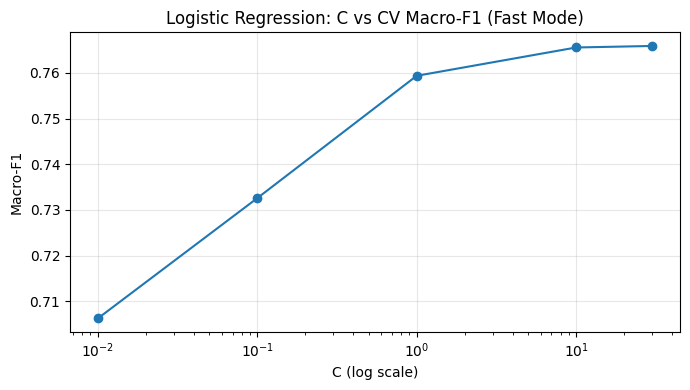

In [10]:
plt.figure(figsize=(7,4))
plt.plot(C_list, log_scores, marker="o")
plt.xscale("log")
plt.title("Logistic Regression: C vs CV Macro-F1 (Fast Mode)")
plt.xlabel("C (log scale)")
plt.ylabel("Macro-F1")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
final_log = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("model", LogisticRegression(C=best_C, penalty="l2", solver="lbfgs", max_iter=5000))
])

final_log.fit(X_train, y_train)
pred_log = final_log.predict(X_val)

print("Logistic Validation Macro-F1:", f1_score(y_val, pred_log, average="macro"))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, pred_log))
print("\nClassification Report:\n", classification_report(y_val, pred_log))


Logistic Validation Macro-F1: 0.7622629716695869

Confusion Matrix:
 [[1089  676]
 [ 227 2024]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71      1765
           1       0.75      0.90      0.82      2251

    accuracy                           0.78      4016
   macro avg       0.79      0.76      0.76      4016
weighted avg       0.78      0.78      0.77      4016



/home/reyhane/Project/Python/AI-FinalProject-Billitio-ML/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی با SVM (Support Vector Machine)
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
SVM یکی از مدل‌های قدرتمند برای طبقه‌بندی است و با انتخاب کرنل مناسب می‌تواند مرزهای تصمیم پیچیده را یاد بگیرد.  
اما SVM معمولاً به مقیاس ویژگی‌ها حساس است؛ بنابراین برای عملکرد بهتر از <b>Scaling</b> استفاده می‌کنیم.
<br><br>
همچنین چون SVM می‌تواند زمان‌بر باشد، برای تست‌های اولیه از نمونه‌گیری ۲۰٪ و از Cross-Validation با تعداد fold کمتر استفاده می‌کنیم تا زمان اجرا منطقی بماند.
</font>
</p>


In [12]:
svm_pipe = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("model", SVC())
])


In [13]:
C_list = [0.1, 1, 10, 30]
svm_linear_results = []

for C in C_list:
    svm_pipe.set_params(model__kernel="linear", model__C=C)
    scores = cross_val_score(svm_pipe, X_train, y_train, cv=cv, scoring=f1_macro)
    svm_linear_results.append({
        "kernel": "linear",
        "C": C,
        "gamma": None,
        "cv_mean_f1": scores.mean(),
        "cv_std_f1": scores.std()
    })
    print(f"[SVM-linear] C={C:<5} => CV Macro-F1: {scores.mean():.4f} (+/- {scores.std():.4f})")


[SVM-linear] C=0.1   => CV Macro-F1: 0.7018 (+/- 0.0058)
[SVM-linear] C=1     => CV Macro-F1: 0.7464 (+/- 0.0052)
[SVM-linear] C=10    => CV Macro-F1: 0.7535 (+/- 0.0062)
[SVM-linear] C=30    => CV Macro-F1: 0.7522 (+/- 0.0070)


In [14]:
C_list = [0.1, 1, 10]
gamma_list = ["scale", 0.1, 0.01]

svm_rbf_results = []

for C in C_list:
    for g in gamma_list:
        svm_pipe.set_params(model__kernel="rbf", model__C=C, model__gamma=g)
        scores = cross_val_score(svm_pipe, X_train, y_train, cv=cv, scoring=f1_macro)
        svm_rbf_results.append({
            "kernel": "rbf",
            "C": C,
            "gamma": g,
            "cv_mean_f1": scores.mean(),
            "cv_std_f1": scores.std()
        })
        print(f"[SVM-rbf] C={C:<4} gamma={str(g):<6} => CV Macro-F1: {scores.mean():.4f} (+/- {scores.std():.4f})")


[SVM-rbf] C=0.1  gamma=scale  => CV Macro-F1: 0.7115 (+/- 0.0020)
[SVM-rbf] C=0.1  gamma=0.1    => CV Macro-F1: 0.6664 (+/- 0.0053)
[SVM-rbf] C=0.1  gamma=0.01   => CV Macro-F1: 0.6648 (+/- 0.0056)
[SVM-rbf] C=1    gamma=scale  => CV Macro-F1: 0.7436 (+/- 0.0027)
[SVM-rbf] C=1    gamma=0.1    => CV Macro-F1: 0.7299 (+/- 0.0029)
[SVM-rbf] C=1    gamma=0.01   => CV Macro-F1: 0.6660 (+/- 0.0055)
[SVM-rbf] C=10   gamma=scale  => CV Macro-F1: 0.7668 (+/- 0.0036)
[SVM-rbf] C=10   gamma=0.1    => CV Macro-F1: 0.7595 (+/- 0.0032)
[SVM-rbf] C=10   gamma=0.01   => CV Macro-F1: 0.7282 (+/- 0.0048)


In [15]:
results_df = pd.DataFrame(svm_linear_results + svm_rbf_results).sort_values("cv_mean_f1", ascending=False)
results_df.head(10)


,kernel,C,gamma,cv_mean_f1,cv_std_f1
10,rbf,10.0,scale,0.766798,0.003617
11,rbf,10.0,0.1,0.759472,0.003239
2,linear,10.0,None,0.753485,0.006195
3,linear,30.0,None,0.752198,0.006951
1,linear,1.0,None,0.746373,0.005196
7,rbf,1.0,scale,0.743635,0.002731
8,rbf,1.0,0.1,0.729914,0.002863
12,rbf,10.0,0.01,0.728152,0.004815
4,rbf,0.1,scale,0.711531,0.002037
0,linear,0.1,None,0.701826,0.005810


In [16]:
best = results_df.iloc[0]
best_kernel = best["kernel"]
best_C = float(best["C"])
best_gamma = best["gamma"]

print("Best SVM params:", best.to_dict())


Best SVM params: {'kernel': 'rbf', 'C': 10.0, 'gamma': 'scale', 'cv_mean_f1': 0.766797549460054, 'cv_std_f1': 0.0036171825025300775}


In [17]:
# ساخت مدل نهایی با بهترین پارامترها
if best_kernel == "linear":
    final_svm = Pipeline(steps=[
        ("scaler", MinMaxScaler()),
        ("model", SVC(kernel="linear", C=best_C))
    ])
else:
    final_svm = Pipeline(steps=[
        ("scaler", MinMaxScaler()),
        ("model", SVC(kernel="rbf", C=best_C, gamma=best_gamma))
    ])

final_svm.fit(X_train, y_train)
pred_svm = final_svm.predict(X_val)

print("SVM Validation Macro-F1:", f1_score(y_val, pred_svm, average="macro"))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, pred_svm))
print("\nClassification Report:\n", classification_report(y_val, pred_svm))


SVM Validation Macro-F1: 0.7671257984239859

Confusion Matrix:
 [[1092  673]
 [ 210 2041]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.62      0.71      1765
           1       0.75      0.91      0.82      2251

    accuracy                           0.78      4016
   macro avg       0.80      0.76      0.77      4016
weighted avg       0.79      0.78      0.77      4016

